In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Load Sample Data, Display #

In [2]:
data = np.load('data/landfill_clear_plastic.npz')
landfill = data['arr_0']
clear = data['arr_1']
plastic = data['arr_2']

In [3]:
plastic[np.isnan(plastic)] = 0

(148, 212, 224)


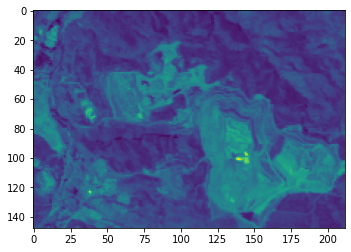

In [4]:
plt.imshow(landfill[:, :, 30])
print(landfill.shape)

(148, 212, 224)


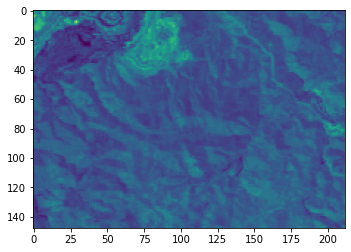

In [5]:
plt.imshow(clear[:, :, 30])
print(clear.shape)

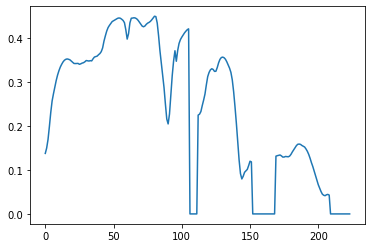

In [6]:
plt.plot(plastic)

# Whitening (Sphering) #

In [7]:
def whitening_matrix(m):
    old_shape = m.shape
    m = m.reshape(-1, old_shape[-1])
    mean = np.mean(m)
    cov = np.cov(m - mean, rowvar=False)
    w, v = np.linalg.eig(cov)
    W = np.matmul(np.matmul(v, np.diag(1 / np.sqrt(1e-6 + w))), v.T)
    return W, mean

def whiten(m, W, mean):
    old_shape = m.shape
    m = m.reshape(-1, old_shape[-1])
    m = m - mean
    m = np.matmul(m, W)
    m = m.reshape(*old_shape)
    return m

In [8]:
W, mean = whitening_matrix(clear)

In [9]:
landfill2 = whiten(landfill, W, mean)
clear2 = whiten(clear, W, mean)
plastic2 = whiten(plastic, W, mean)

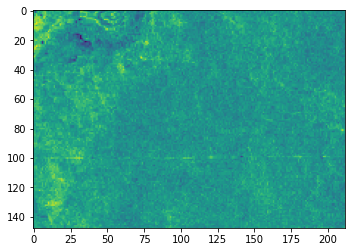

In [10]:
plt.imshow(clear2[:, :, 30])

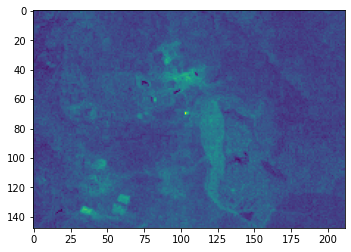

In [11]:
plt.imshow(landfill2[:, :, 30])

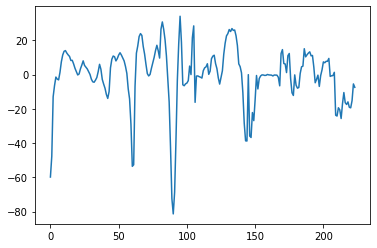

In [12]:
plt.plot(plastic2)

# Matching Filter (Correlation) #

In [13]:
def score(area, spectrum):
    old_shape = area.shape
    area = area.reshape(-1, old_shape[-1])
    area = np.matmul(area, spectrum)
    area = area.reshape(*old_shape[0:2])
    return area

## Correlation in Whitened Space ##

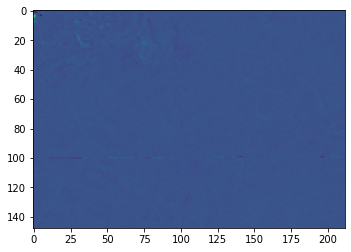

In [14]:
clear3 = score(clear2, plastic2)
plt.imshow(clear3)

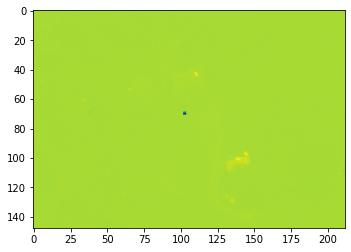

In [15]:
landfill3 = score(landfill2, plastic2)
plt.imshow(landfill3)

(array([[  0.,   0., 141., ...,   1.,   0.,   1.],
        [  2.,   0., 143., ...,   0.,   0.,   0.],
        [  0.,   2., 146., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0., 148., ...,   0.,   0.,   0.],
        [  0.,   0., 148., ...,   0.,   0.,   0.],
        [  0.,   0., 148., ...,   0.,   0.,   0.]]),
 array([19015.72574083, 20744.7655442 , 22473.80534758, 24202.84515096,
        25931.88495433, 27660.92475771, 29389.96456109, 31119.00436446,
        32848.04416784, 34577.08397122, 36306.12377459]),
 <a list of 212 BarContainer objects>)

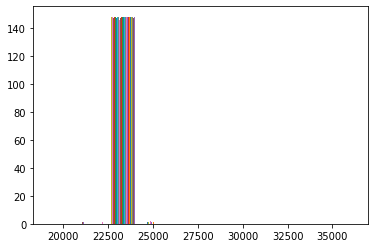

In [16]:
plt.hist(clear3)

(array([[  0.,   0.,   0., ...,   0., 148.,   0.],
        [  0.,   0.,   0., ...,   0., 148.,   0.],
        [  0.,   0.,   0., ...,   0., 148.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0., 148.,   0.],
        [  0.,   0.,   0., ...,   0., 148.,   0.],
        [  0.,   0.,   0., ...,   0., 148.,   0.]]),
 array([-82116.77060417, -69952.99683818, -57789.22307218, -45625.44930619,
        -33461.67554019, -21297.9017742 ,  -9134.1280082 ,   3029.64575779,
         15193.41952379,  27357.19328978,  39520.96705578]),
 <a list of 212 BarContainer objects>)

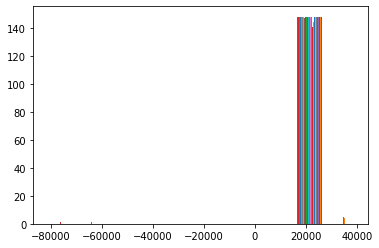

In [17]:
plt.hist(landfill3)

In [18]:
clear4 = np.clip(clear3, 1.5e4, 4e4)
landfill4 = np.clip(landfill3, 1.5e4, 4e4)

This is can be done with a [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function).

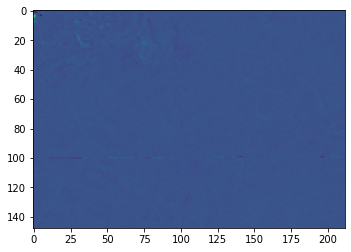

In [19]:
plt.imshow(clear4)

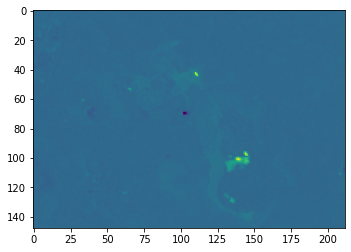

In [20]:
plt.imshow(landfill4)

(array([[  0.,   0., 141., ...,   1.,   0.,   1.],
        [  2.,   0., 143., ...,   0.,   0.,   0.],
        [  0.,   2., 146., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0., 148., ...,   0.,   0.,   0.],
        [  0.,   0., 148., ...,   0.,   0.,   0.],
        [  0.,   0., 148., ...,   0.,   0.,   0.]]),
 array([19015.72574083, 20744.7655442 , 22473.80534758, 24202.84515096,
        25931.88495433, 27660.92475771, 29389.96456109, 31119.00436446,
        32848.04416784, 34577.08397122, 36306.12377459]),
 <a list of 212 BarContainer objects>)

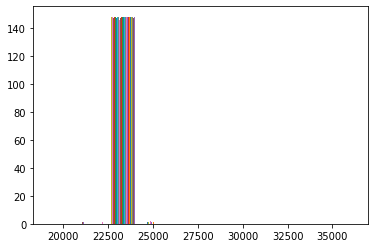

In [21]:
plt.hist(clear4)

(array([[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 2., ..., 0., 0., 0.]]),
 array([15000.        , 17452.09670558, 19904.19341116, 22356.29011673,
        24808.38682231, 27260.48352789, 29712.58023347, 32164.67693904,
        34616.77364462, 37068.8703502 , 39520.96705578]),
 <a list of 212 BarContainer objects>)

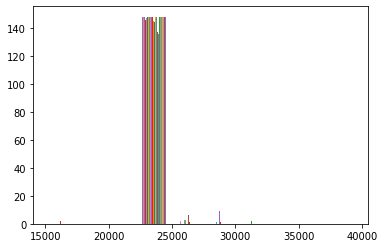

In [22]:
plt.hist(landfill4)

## Control: Correlation in Native Space ##

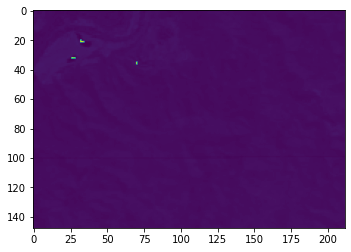

In [23]:
plt.imshow(score(clear, plastic))

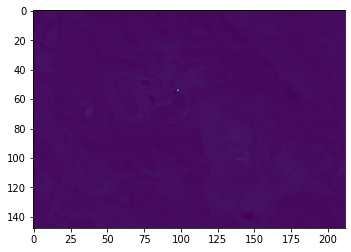

In [24]:
plt.imshow(score(landfill, plastic))

# Band Selection #

(array([ 2.,  2.,  3.,  6.,  6., 17., 54., 86., 33., 15.]),
 array([-81.38690376, -69.8358569 , -58.28481004, -46.73376318,
        -35.18271631, -23.63166945, -12.08062259,  -0.52957573,
         11.02147113,  22.57251799,  34.12356485]),
 <BarContainer object of 10 artists>)

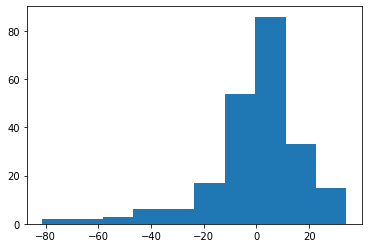

In [25]:
plt.hist(plastic2)

In [ ]:
(plastic2 > 20).sum()

In [ ]:
plastic3 = plastic2 * (plastic2 > 20)
landfill42 = score(landfill2, plastic3)
clear42 = score(clear2, plastic3)

In [ ]:
print(np.min(clear42), np.max(clear42))
plt.hist(clear42)

In [ ]:
print(np.min(landfill42), np.max(landfill42))
plt.hist(landfill42)

In [ ]:
clear107 = np.clip(clear42, -1.2e3, 1.5e3)
landfill107 = np.clip(landfill42, -1.2e3, 1.5e3)

In [ ]:
plt.imshow(clear107)

In [ ]:
plt.imshow(landfill107)

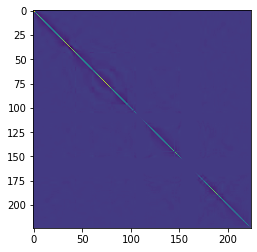

In [26]:
plt.imshow(W)

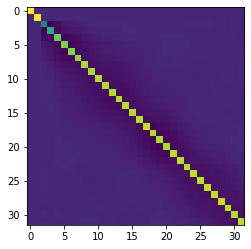

In [27]:
plt.imshow(W[:32,:32])

In [28]:
def whiten2(m, W, mean):
    old_shape = m.shape
    m = m.reshape(-1, old_shape[-1])
    m = m - mean
    m = np.multiply(m, (np.abs(plastic2) > 8))
    m = np.matmul(m, W)
    m = m.reshape(*old_shape)
    return m

In [29]:
clear5 = score(whiten2(clear, W, mean), plastic2)
landfill5 = score(whiten2(landfill, W, mean), plastic2)

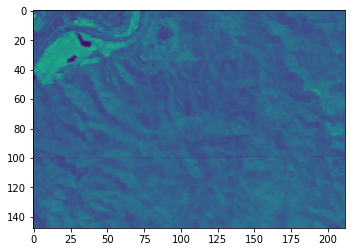

In [30]:
plt.imshow(clear5)

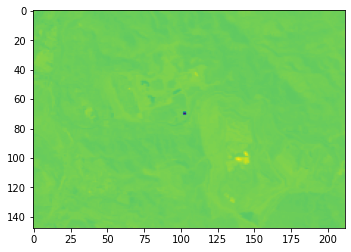

In [31]:
plt.imshow(landfill5)

(array([[ 4.,  4., 82., ...,  1.,  0.,  1.],
        [ 0.,  4., 91., ...,  0.,  0.,  0.],
        [ 0.,  4., 81., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0., 52., ...,  0.,  0.,  0.],
        [ 0.,  0., 50., ...,  0.,  0.,  0.],
        [ 0.,  0., 46., ...,  0.,  0.,  0.]]),
 array([10424.29192464, 14365.61826792, 18306.9446112 , 22248.27095448,
        26189.59729776, 30130.92364105, 34072.24998433, 38013.57632761,
        41954.90267089, 45896.22901417, 49837.55535745]),
 <a list of 212 BarContainer objects>)

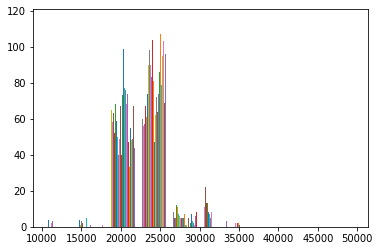

In [32]:
plt.hist(clear5)

(array([[  0.,   0.,   0., ..., 147.,   1.,   0.],
        [  0.,   0.,   0., ..., 144.,   4.,   0.],
        [  0.,   0.,   0., ..., 141.,   7.,   0.],
        ...,
        [  0.,   0.,   0., ..., 141.,   7.,   0.],
        [  0.,   0.,   0., ..., 141.,   7.,   0.],
        [  0.,   0.,   0., ..., 144.,   4.,   0.]]),
 array([-135847.277755  , -115432.73525121,  -95018.19274741,
         -74603.65024362,  -54189.10773983,  -33774.56523603,
         -13360.02273224,    7054.51977155,   27469.06227534,
          47883.60477914,   68298.14728293]),
 <a list of 212 BarContainer objects>)

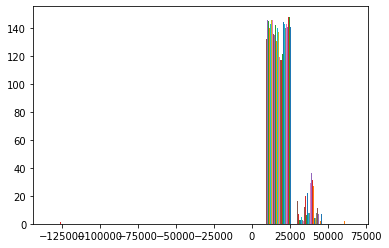

In [33]:
plt.hist(landfill5)

In [34]:
clear6 = np.clip(clear5, 1e4, 5e4)
landfill6 = np.clip(landfill5, 1e4, 5e4)

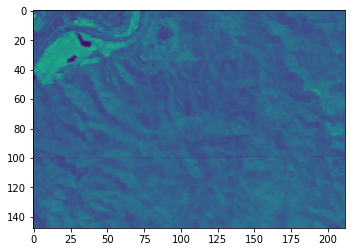

In [35]:
plt.imshow(clear6)

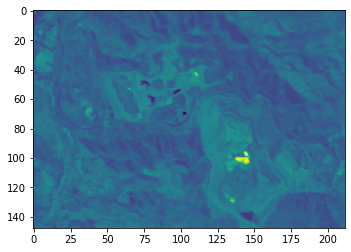

In [36]:
plt.imshow(landfill6)